# Explore here

In [3662]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import *

### DATA ANALYSIS FOR US COUNTY-LEVEL SOCIODEMOGRAPHIC AND HEALTH RESOURCE DATA (2018-2019)
# Get Demographic Health data
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

# Print the first rows of the dataframe for visualization
df.head()


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [3663]:
# Print the last rows of the dataframe for visualization
df.tail()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6
3139,56045,6967,780,11.195637,779,11.181283,681,9.774652,906,13.004162,...,480,11.7,10.7,12.7,644,3.4,3.1,3.6,185,6


In [3664]:
df.shape

(3140, 108)

In [3665]:
df.head().T

,0,1,2,3,4
fips,1001,1003,1005,1007,1009
TOT_POP,55601,218022,24881,22400,57840
0-9,6787,24757,2732,2456,7095
0-9 y/o % of total pop,12.206615,11.355276,10.980266,10.964286,12.266598
19-Oct,7637,26913,2960,2596,7570
...,...,...,...,...,...
CKD_prevalence,3.1,3.2,4.5,3.3,3.4
CKD_Lower 95% CI,2.9,3.0,4.2,3.1,3.2
CKD_Upper 95% CI,3.3,3.5,4.8,3.6,3.7
CKD_number,1326,5479,887,595,1507


In [3666]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [3667]:
df.select_dtypes(include=['object'])

,COUNTY_NAME,STATE_NAME
0,Autauga,Alabama
1,Baldwin,Alabama
2,Barbour,Alabama
3,Bibb,Alabama
4,Blount,Alabama
...,...,...
3135,Sweetwater,Wyoming
3136,Teton,Wyoming
3137,Uinta,Wyoming
3138,Washakie,Wyoming


In [3668]:
# Start Exploratory data analysis (EDA)
# Count the number of unique values in the dataframe
print("Number of unique values:\n")
df.nunique()

Number of unique values:



fips                      3140
TOT_POP                   3074
0-9                       2723
0-9 y/o % of total pop    3136
19-Oct                    2743
                          ... 
CKD_prevalence              43
CKD_Lower 95% CI            39
CKD_Upper 95% CI            46
CKD_number                1894
Urban_rural_code             6
Length: 108, dtype: int64

In [3669]:
# Unique values of the column "STATE_NAME"
print(f"Number of unique values of the column STATE_NAME: {(df['STATE_NAME'].nunique())}")


Number of unique values of the column STATE_NAME: 51


In [3670]:
# Count the total number of unique values in the dataframe
print(f"Total number of unique values in the dataframe: {((df.nunique() == 1).sum()):.2f}")

Total number of unique values in the dataframe: 0.00


There are no unique values in the dataframe.

In [3671]:
# Get the names of the columns of the dataframe
# Names of the 55 first columns
print(f"Columns names: {df.columns.values[:55]}")

Columns names: ['fips' 'TOT_POP' '0-9' '0-9 y/o % of total pop' '19-Oct'
 '10-19 y/o % of total pop' '20-29' '20-29 y/o % of total pop' '30-39'
 '30-39 y/o % of total pop' '40-49' '40-49 y/o % of total pop' '50-59'
 '50-59 y/o % of total pop' '60-69' '60-69 y/o % of total pop' '70-79'
 '70-79 y/o % of total pop' '80+' '80+ y/o % of total pop'
 'White-alone pop' '% White-alone' 'Black-alone pop' '% Black-alone'
 'Native American/American Indian-alone pop' '% NA/AI-alone'
 'Asian-alone pop' '% Asian-alone' 'Hawaiian/Pacific Islander-alone pop'
 '% Hawaiian/PI-alone' 'Two or more races pop' '% Two or more races'
 'POP_ESTIMATE_2018' 'N_POP_CHG_2018' 'GQ_ESTIMATES_2018' 'R_birth_2018'
 'R_death_2018' 'R_NATURAL_INC_2018' 'R_INTERNATIONAL_MIG_2018'
 'R_DOMESTIC_MIG_2018' 'R_NET_MIG_2018'
 'Less than a high school diploma 2014-18'
 'High school diploma only 2014-18'
 "Some college or associate's degree 2014-18"
 "Bachelor's degree or higher 2014-18"
 'Percent of adults with less than a high 

In [3672]:
# Names of the columns 56 to 108
print(f"Columns names: {df.columns.values[55:108]}")

Columns names: ['CI90UBINC_2018' 'Civilian_labor_force_2018' 'Employed_2018'
 'Unemployed_2018' 'Unemployment_rate_2018' 'Median_Household_Income_2018'
 'Med_HH_Income_Percent_of_State_Total_2018'
 'Active Physicians per 100000 Population 2018 (AAMC)'
 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)'
 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)'
 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)'
 'Active General Surgeons per 100000 Population 2018 (AAMC)'
 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)'
 'Total nurse practitioners (2019)' 'Total physician assistants (2019)'
 'Total Hospitals (2019)' 'Internal Medicine Primary Care (2019)'
 'Family Medicine/General Practice Primary Care (2019)'
 'Total Specialist Physicians (2019)' 'ICU Beds_x' 'Total Population'
 'Population Aged 60+' 'Percent of Population Aged 60+' 'COUNTY_NAME'
 'STATE_NAME' 'STATE_FIPS' 'CNTY_FIPS' 'county_pop2018_1

In [3673]:
# Get the columns related to county and state identification
df.iloc[:,78:82]

,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS
0,Autauga,Alabama,1,1
1,Baldwin,Alabama,1,3
2,Barbour,Alabama,1,5
3,Bibb,Alabama,1,7
4,Blount,Alabama,1,9
...,...,...,...,...
3135,Sweetwater,Wyoming,56,37
3136,Teton,Wyoming,56,39
3137,Uinta,Wyoming,56,41
3138,Washakie,Wyoming,56,43


"STATE_FIPS" and "CNTY_FIPS" values are parts of the "fips" value.
The columns "STATE_FIPS" and "CNTY_FIPS" could be eliminated as they are duplicated information.

In [3674]:
# Get the unique values of some columns
print(f"Two or more races pop values: {(sorted(df['Two or more races pop'].unique()))}")

Two or more races pop values: [np.int64(0), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(14), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), np.int64(72), np.int64(73), np.int64(7

In [3675]:
# Check if "anycondition_number" column is the sum of the other diseases numbers in the dataset
# Print "anycondition_number" value for the first county
print(df.iloc[0]["anycondition_number"])

20181


In [3676]:
# Get the columns of the diseases numbers
df.iloc[:, [86,90,94,98,102,106]]

,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number
0,20181,15193,3345,3644,5462,1326
1,68790,50761,13414,14692,20520,5479
2,11325,8013,2159,2373,3870,887
3,9190,6894,1533,1789,2511,595
4,20584,15112,4101,4661,6017,1507
...,...,...,...,...,...,...
3135,12796,10672,1862,2098,2834,821
3136,4576,3655,981,928,1360,447
3137,6101,4944,1034,1163,1500,430
3138,2285,1730,500,506,686,207


In [3677]:
# Sum of the diseases number values for the first county
print(df.iloc[0]["Obesity_number"]+df.iloc[0]["Heart disease_number"]+df.iloc[0]["COPD_number"]+df.iloc[0]["diabetes_number"]+df.iloc[0]["CKD_number"])

28970


The "anycondition_number" column is not the sum of the other diseases numbers in the dataset, one person could have more than one disease.
The "anycondition_number" column will not be dropped as it can not be calculated with other columns in the dataframe.

In [3678]:
# Get the columns of total population
df.iloc[:, [1,75]]

,TOT_POP,Total Population
0,55601,55036
1,218022,203360
2,24881,26201
3,22400,22580
4,57840,57667
...,...,...
3135,43051,44527
3136,23081,22923
3137,20299,20758
3138,7885,8253


In [3679]:
print(f'Sum of the "TOT_POP" values: {df["TOT_POP"].sum()}')
print(f'Sum of the "Total Population" values: {df["Total Population"].sum()}')

Sum of the "TOT_POP" values: 327154755
Sum of the "Total Population" values: 320991630


There are two columns with the total population numbers: "TOT_POP" and "Total population".

As the population of the United States in 2018 was approximately 327 million, the column "Total population" is dropped.

"TOT_POP" values are more updated.


ELIMINATION OF DUPLICATED OR IRRELEVANT INFORMATION IN THE DATAFRAME

The dataframe has 108 columns.
Some columns have irrelevant information and some columns have duplicated information that can be inferred from other columns. 
The following columns can be dropped:

COUNTY AND STATE IDENTIFICATION
- "COUNTY_NAME" is a duplicated information as there is also the "fips" (FIPS Code for the County).
- "STATE_FIPS" and "CNTY_FIPS" are duplicated information as they are parts of the "fips" value.

POPULATION
- "Total population": There are two columns with the total population numbers "TOT_POP" and "Total population" and "TOT_POP" values are more accurate.

AGE COLUMNS
There are data for age ranges and the percentages for each range, the age range values are dropped because the percentage values are already scaled.
- age_ranges population (for example, "0-9"): these data can be calculated with the Percentage of the range ages and the total population ("TOT_POP").
- "R_NATURAL_INC_2018": Natural increase rate is the birth rate minus the death rate of a particular population, over a particular time period.

RACIAL COLUMNS
There are data for the racial populations and the percentage for each race, the racial populations are dropped because the percentage values are already scaled.
- racial population (for example, "White-alone pop"): these data can be calculated with the Percentage of the racial population and the total population.
"Two or more races pop" column can be calculated substracting the other racial populations to the total population but it will not dropped because it can be relevant information for the data analysis as the values for this column are from 0 to 313.259 people in a county and it is a large range.

EDUCATION COLUMNS
There are data for the education types and the percentage for each education type, the education types columns are dropped because the percentage values are already scaled.
- education types (for example, "Less than a high school diploma 2014-18"): these data can be calculated with the Percentages of the type of education and the total population.

POVERTY COLUMNS
There are data for the total poverty and the percentage of poverty, the population in poverty column is dropped because the percentage value is already scaled.
- POVALL_2018,Estimate of people of all ages in poverty 2018.

HOUSEHOLD INCOME COLUMNS
There are date for the median household income and for the percentage of the median household income, the median incomes column is dropped because the percentage values are already scaled.
- "Median_Household_Income_2018" column is dropped.
- The household income Confidence Interval (CI) columns are dropped as the CI is an estimation and there is a column with the porcentage of the median income ("Med_HH_Income_Percent_of_State_Total_2018").

EMPLOYMENT COLUMNS
- Unemployment rate: this data can be calculated with the formula: (Unemployed people / Total labor force) × 100.

DISEASE COLUMNS
- The disease numbers can be calculated with the disease prevalence rates and the total population, so the disease numbers columns are dropped.
- The disease CI columns are not relevant information and are dropped.

In total, 48 columns are dropped.

In [3680]:
# Eliminate irrelevant or duplicated information
# Drop the duplicated county identification columns
df.drop(['COUNTY_NAME','STATE_FIPS','CNTY_FIPS'],axis=1, inplace=True)
df.shape



(3140, 105)

In [3681]:
# Drop the "Total population" columns
df.drop(['Total Population'],axis=1, inplace=True)
df.shape

(3140, 104)

In [3682]:
# Drop the age range columns
df.drop(["R_NATURAL_INC_2018","0-9","19-Oct","20-29","30-39","40-49","50-59","60-69","70-79","80+","Population Aged 60+"],axis=1, inplace=True)
df.shape

(3140, 93)

In [3683]:
# Drop the racial population columns
#df.drop(['Two or more races pop','% White-alone','% Black-alone', '% NA/AI-alone','% Asian-alone','% Hawaiian/PI-alone','% Two or more races'],axis=1, inplace=True)
df.drop(['White-alone pop','Black-alone pop', 'Native American/American Indian-alone pop','Asian-alone pop','Hawaiian/Pacific Islander-alone pop','Two or more races pop'],axis=1, inplace=True)
df.shape

(3140, 87)

In [3684]:
# Drop the education type columns
df.drop(["Less than a high school diploma 2014-18","High school diploma only 2014-18","Some college or associate's degree 2014-18","Bachelor's degree or higher 2014-18"],axis=1, inplace=True)
df.shape


(3140, 83)

In [3685]:
# Drop the poverty percentage column
df.drop(["PCTPOVALL_2018"],axis=1, inplace=True)
df.shape

(3140, 82)

In [3686]:
# Drop household income columns
df.drop(['Median_Household_Income_2018','CI90LBINC_2018','CI90UBINC_2018'],axis=1, inplace=True)
df.shape

(3140, 79)

In [3687]:
# Drop Umemployment Rate column
df.drop(['Unemployment_rate_2018'],axis=1, inplace=True)
df.shape

(3140, 78)

In [3688]:
# Drop the disease numbers and disease CI columns
df.drop(['anycondition_number','anycondition_Lower 95% CI','anycondition_Upper 95% CI', 'Obesity_number','Obesity_Lower 95% CI','Obesity_Upper 95% CI','Heart disease_number','Heart disease_Lower 95% CI','Heart disease_Upper 95% CI','COPD_number','COPD_Lower 95% CI','COPD_Upper 95% CI','diabetes_number','diabetes_Lower 95% CI','diabetes_Upper 95% CI','CKD_number','CKD_Lower 95% CI','CKD_Upper 95% CI'],axis=1, inplace=True)
df.shape

(3140, 60)

It is not needed to check the df.shape for each drop of columns but it is done for training purpose.

In [3689]:
df.head()

,fips,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,...,Percent of Population Aged 60+,STATE_NAME,county_pop2018_18 and older,anycondition_prevalence,Obesity_prevalence,Heart disease_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence,Urban_rural_code
0,1001,55601,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,...,19.1,Alabama,42438,47.6,35.8,7.9,8.6,12.9,3.1,3
1,1003,218022,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,...,26.3,Alabama,170912,40.2,29.7,7.8,8.6,12.0,3.2,4
2,1005,24881,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,...,23.5,Alabama,19689,57.5,40.7,11.0,12.1,19.7,4.5,6
3,1007,22400,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,...,21.1,Alabama,17813,51.6,38.7,8.6,10.0,14.1,3.3,2
4,1009,57840,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,...,23.6,Alabama,44448,46.3,34.0,9.2,10.5,13.5,3.4,2


In [3690]:
# Check if duplicates
print(f"Duplicate values: {df.duplicated().sum():.2f}")

Duplicate values: 0.00


In [3691]:
# Description of the numeric variables
df.describe()

,fips,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,...,ICU Beds_x,Percent of Population Aged 60+,county_pop2018_18 and older,anycondition_prevalence,Obesity_prevalence,Heart disease_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence,Urban_rural_code
count,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,...,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,11.871051,12.694609,12.283979,11.751535,11.556685,13.526733,13.182225,8.399382,...,23.817516,24.736943,8.081460e+04,46.793917,35.019299,8.607803,9.095223,13.073503,3.446242,4.635350
std,15150.559265,3.335834e+05,2.124081,1.815044,3.126297,1.696599,1.372935,1.481692,2.532498,2.214915,...,84.602028,5.564871,2.585190e+05,6.379448,4.517088,1.758587,2.344965,2.724351,0.568059,1.510447
min,1001.000000,8.800000e+01,0.000000,0.000000,0.000000,6.092789,2.631579,5.316361,3.444403,2.199551,...,0.000000,5.800000,8.800000e+01,22.000000,15.200000,3.500000,3.500000,6.100000,1.800000,1.000000
25%,18180.500000,1.096325e+04,10.594639,11.674504,10.496774,10.689322,10.685197,12.738561,11.621232,7.032275,...,0.000000,21.200000,8.460250e+03,42.900000,32.400000,7.400000,7.300000,11.200000,3.100000,3.000000
50%,29178.000000,2.580050e+04,11.802727,12.687422,11.772649,11.580861,11.618372,13.621339,13.013409,8.208162,...,0.000000,24.400000,2.023000e+04,47.200000,35.400000,8.600000,8.900000,12.800000,3.400000,5.000000
75%,45081.500000,6.791300e+04,12.951840,13.659282,13.182260,12.639379,12.386083,14.429115,14.467254,9.445777,...,12.000000,27.800000,5.282025e+04,51.000000,37.900000,9.800000,10.600000,14.800000,3.800000,6.000000
max,56045.000000,1.010552e+07,25.460677,23.304372,37.570198,22.225129,19.430369,20.454545,27.272727,31.327959,...,2126.000000,64.200000,7.916625e+06,66.200000,49.900000,15.100000,19.900000,25.600000,6.200000,6.000000


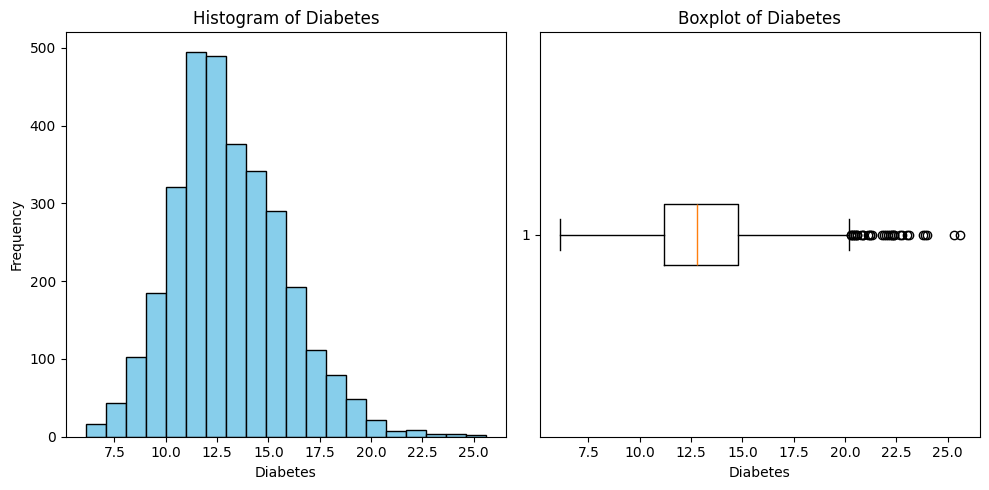

In [3692]:
# Histogram and boxplot of the "diabetes_prevalence" variable
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Histogram in the first subplot
ax[0].hist(df['diabetes_prevalence'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histogram of Diabetes')
ax[0].set_xlabel('Diabetes')
ax[0].set_ylabel('Frequency')

# Boxplot in the second subplot
ax[1].boxplot(df['diabetes_prevalence'], vert=False)
ax[1].set_title('Boxplot of Diabetes')
ax[1].set_xlabel('Diabetes')

# Show the graph
plt.tight_layout()
plt.show()


In [3693]:
zero_values = (df['diabetes_prevalence'] == 0).sum()
print(f"Number of zero values of 'diabetes_prevalence' column is: {zero_values:.2f}")

Number of zero values of 'diabetes_prevalence' column is: 0.00


There are no zero values in "diabetes_prevalence" column.

In [3694]:
# Check the lines with at least one isnull value (%)
print(f"Lines with at least one isnull value in df: {df.isnull().any(axis=1).mean()*100:.2f} %")

Lines with at least one isnull value in df: 0.00 %


In [3695]:
# Change 'STATE_NAME' column to numeric
# 51 unique values has the column 'STATE_NAME'
print(f"STATE_NAME values: {df['STATE_NAME'].unique()}")
# Initialize the label encoder
label_encoder = LabelEncoder()
# Apply label encoding to the column
df['STATE_NAME'] = label_encoder.fit_transform(df['STATE_NAME'])

STATE_NAME values: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [3696]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 60 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   fips                                                                           3140 non-null   int64  
 1   TOT_POP                                                                        3140 non-null   int64  
 2   0-9 y/o % of total pop                                                         3140 non-null   float64
 3   10-19 y/o % of total pop                                                       3140 non-null   float64
 4   20-29 y/o % of total pop                                                       3140 non-null   float64
 5   30-39 y/o % of total pop                                                       3140 non-null   float64
 6   40-49 y/o % of total pop

The target variable for this data analysis is "diabetes_prevalence".

In [3697]:
# Calculate influence
# Split x and y variables
X = df.drop(['diabetes_prevalence'], axis=1)
y = df['diabetes_prevalence']

# OLS regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(f"Columns names X: {X.columns.values}")
# Eliminate "const" column in the dataframe X
X = X.drop(columns=['const'])               
print("X: ")
X.head()


Columns names X: ['const' 'fips' 'TOT_POP' '0-9 y/o % of total pop'
 '10-19 y/o % of total pop' '20-29 y/o % of total pop'
 '30-39 y/o % of total pop' '40-49 y/o % of total pop'
 '50-59 y/o % of total pop' '60-69 y/o % of total pop'
 '70-79 y/o % of total pop' '80+ y/o % of total pop' '% White-alone'
 '% Black-alone' '% NA/AI-alone' '% Asian-alone' '% Hawaiian/PI-alone'
 '% Two or more races' 'POP_ESTIMATE_2018' 'N_POP_CHG_2018'
 'GQ_ESTIMATES_2018' 'R_birth_2018' 'R_death_2018'
 'R_INTERNATIONAL_MIG_2018' 'R_DOMESTIC_MIG_2018' 'R_NET_MIG_2018'
 'Percent of adults with less than a high school diploma 2014-18'
 'Percent of adults with a high school diploma only 2014-18'
 "Percent of adults completing some college or associate's degree 2014-18"
 "Percent of adults with a bachelor's degree or higher 2014-18"
 'POVALL_2018' 'PCTPOV017_2018' 'PCTPOV517_2018' 'MEDHHINC_2018'
 'Civilian_labor_force_2018' 'Employed_2018' 'Unemployed_2018'
 'Med_HH_Income_Percent_of_State_Total_2018'
 'Active P

,fips,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,...,ICU Beds_x,Percent of Population Aged 60+,STATE_NAME,county_pop2018_18 and older,anycondition_prevalence,Obesity_prevalence,Heart disease_prevalence,COPD_prevalence,CKD_prevalence,Urban_rural_code
0,1001,55601,12.206615,13.735364,12.370281,12.749771,13.636445,13.917016,10.478229,7.284042,...,6,19.1,0,42438,47.6,35.8,7.9,8.6,3.1,3
1,1003,218022,11.355276,12.344167,10.814964,11.564429,12.539102,13.753658,13.728890,9.602701,...,51,26.3,0,170912,40.2,29.7,7.8,8.6,3.2,4
2,1005,24881,10.980266,11.896628,13.134520,12.865239,12.354809,13.174712,12.362847,9.018930,...,5,23.5,0,19689,57.5,40.7,11.0,12.1,4.5,6
3,1007,22400,10.964286,11.589286,13.522321,13.897321,13.562500,13.906250,11.361607,7.691964,...,0,21.1,0,17813,51.6,38.7,8.6,10.0,3.3,2
4,1009,57840,12.266598,13.087828,11.656293,11.901798,12.921853,13.561549,12.041840,8.525242,...,6,23.6,0,44448,46.3,34.0,9.2,10.5,3.4,2


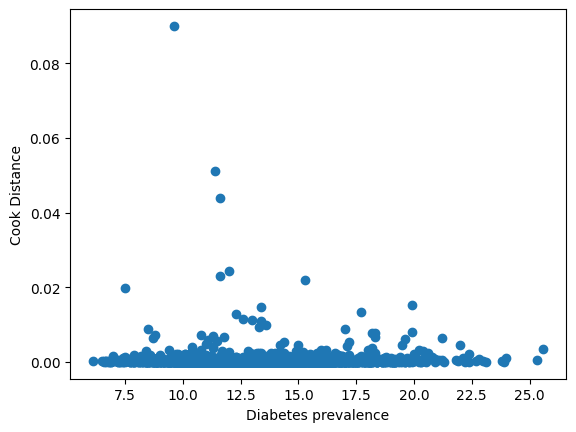

In [3698]:
# Calculate the Cook distance
cooks_distance = model.get_influence().cooks_distance

# Scatter plot of the Cook distance vs diabetes number
plt.scatter(df.diabetes_prevalence, cooks_distance[0])
plt.xlabel('Diabetes prevalence')
plt.ylabel('Cook Distance')
plt.show()


In [3699]:
# Cook distance threshold
t_point = 4/len(df)
print(f"t_point: {t_point}")

t_point: 0.0012738853503184713


In [3700]:
# Calculate any customers that exceed the 4/n threshold
print(f"Customers that exceed the 4/n threshold: {len(np.where(cooks_distance[0]>t_point)[0]):.2f}")
print(f"Customers that have a Cook distance higher than 0.02:")
print(np.where(cooks_distance[0]>0.02))

Customers that exceed the 4/n threshold: 152.00
Customers that have a Cook distance higher than 0.02:
(array([ 101,  202,  546, 1849, 2577, 2671]),)


In [3701]:
# Eliminate influences
df=df.drop(np.where(cooks_distance[0]>t_point)[0])

In [3702]:
df.shape

(2988, 60)

In [3703]:
stats = df.describe(include="all")
print(stats)

               fips       TOT_POP  0-9 y/o % of total pop  \
count   2988.000000  2.988000e+03             2988.000000   
mean   30455.208501  7.818859e+04               11.836401   
std    15066.970839  1.882396e+05                2.060150   
min     1001.000000  2.770000e+02                3.908228   
25%    19008.500000  1.097700e+04               10.587724   
50%    29170.000000  2.539450e+04               11.776411   
75%    45067.500000  6.425300e+04               12.926485   
max    56045.000000  5.180493e+06               25.460677   

       10-19 y/o % of total pop  20-29 y/o % of total pop  \
count               2988.000000               2988.000000   
mean                  12.687011                 12.230057   
std                    1.756878                  3.087462   
min                    3.822794                  5.209159   
25%                   11.680543                 10.481983   
50%                   12.685084                 11.715208   
75%                   1

In [3704]:
# Feature importance
# Train/test split
X = df.drop(['diabetes_prevalence'], axis=1)
y = df['diabetes_prevalence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature importance using xgb
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp

,Feature,Importance
57,CKD_prevalence,75.789703
53,anycondition_prevalence,8.337669
40,Active Patient Care Primary Care Physicians pe...,4.573383
39,Active Primary Care Physicians per 100000 Popu...,1.552796
56,COPD_prevalence,1.459457
25,Percent of adults with less than a high school...,1.307025
12,% Black-alone,0.844058
38,Total Active Patient Care Physicians per 10000...,0.707912
37,Active Physicians per 100000 Population 2018 (...,0.583072
55,Heart disease_prevalence,0.505023


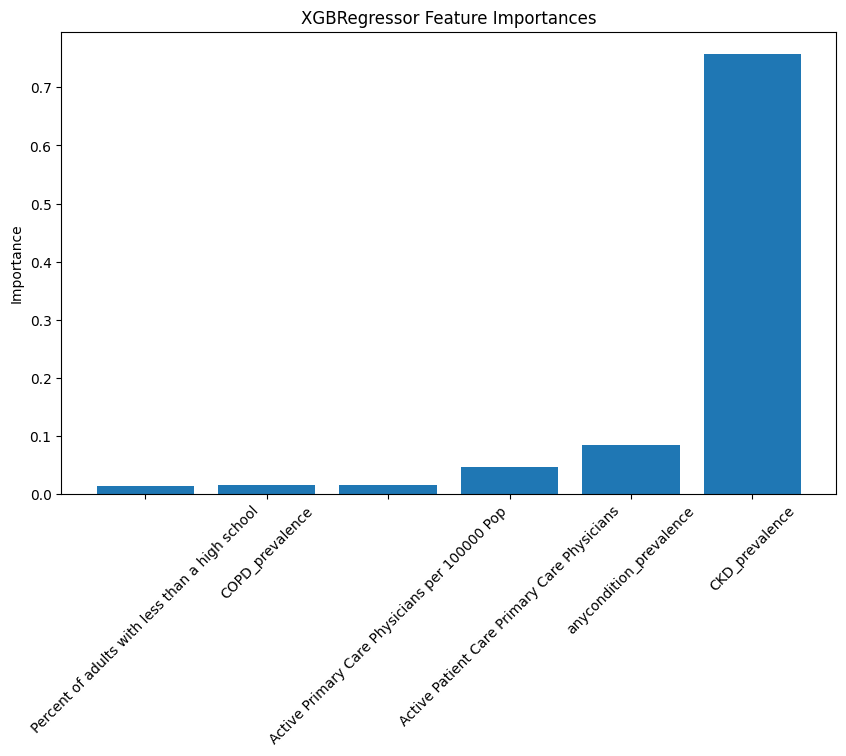

In [3705]:
# Extract feature importances
importances = xgb_model.feature_importances_
sorted_importances=sorted(importances)
labels=['Percent of adults with less than a high school','COPD_prevalence','Active Primary Care Physicians per 100000 Pop','Active Patient Care Primary Care Physicians','anycondition_prevalence','CKD_prevalence']

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances[0:6])), sorted_importances[53:60])
plt.xticks(range(len(importances[0:6])), labels, rotation=45)

plt.ylabel("Importance")
plt.title("XGBRegressor Feature Importances")
plt.show()


In [3706]:
df_imp[df_imp.Importance>1]['Feature'].values

array(['CKD_prevalence', 'anycondition_prevalence',
       'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
       'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
       'COPD_prevalence',
       'Percent of adults with less than a high school diploma 2014-18'],
      dtype=object)

In [3707]:
# Select the features with more than 1% of importance
X_train = X_train[df_imp[df_imp.Importance>1]['Feature'].values]
X_test = X_test[df_imp[df_imp.Importance>1]['Feature'].values]


In [3708]:
# VIF
X_train.corr()

vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

CKD_prevalence                                                                     31.148571
anycondition_prevalence                                                            90.112243
Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)    5117.770081
Active Primary Care Physicians per 100000 Population 2018 (AAMC)                 4802.706124
COPD_prevalence                                                                    53.030166
Percent of adults with less than a high school diploma 2014-18                     12.430002
dtype: float64

<Axes: >

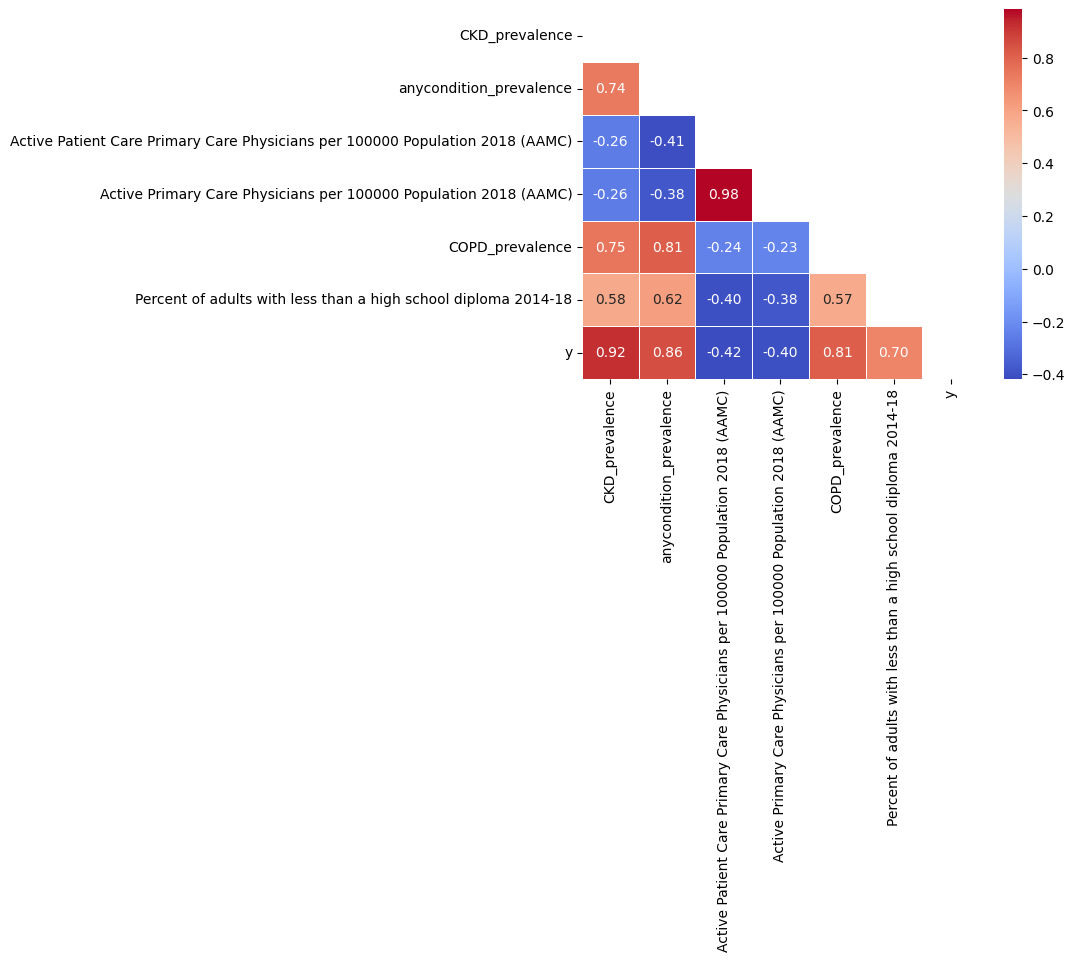

In [3709]:
# Heatmap of correlation
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')


To avoid high correlation between independent variables, 'anycondition_prevalence' and'Active Primary Care Physicians per 100000 Population 2018 (AAMC)' columns are dropped.

In [3710]:
X_train.drop(['anycondition_prevalence','COPD_prevalence','Active Primary Care Physicians per 100000 Population 2018 (AAMC)'], axis=1, inplace=True)
X_test.drop(['anycondition_prevalence','COPD_prevalence','Active Primary Care Physicians per 100000 Population 2018 (AAMC)'], axis=1, inplace=True)


<Axes: >

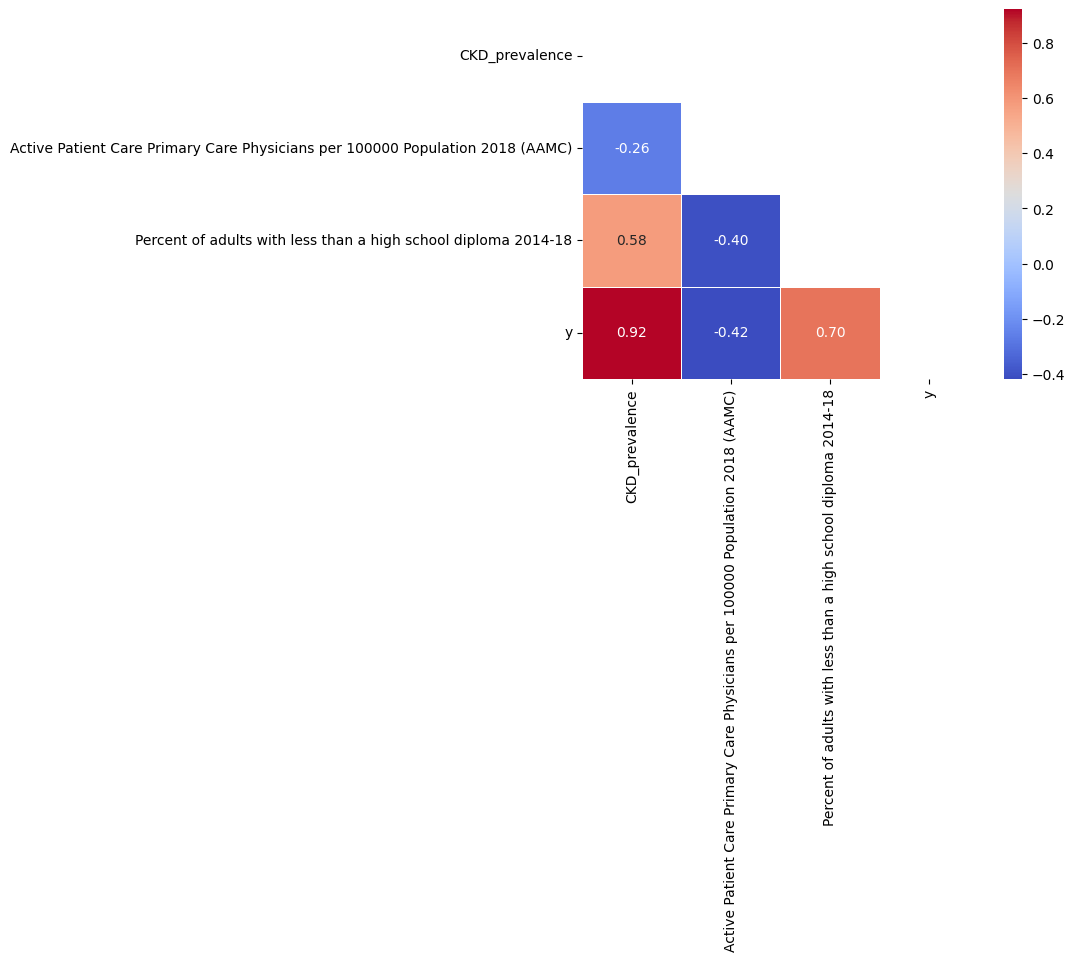

In [3711]:
# Heatmap of correlation
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [3712]:
X_train

,CKD_prevalence,Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Percent of adults with less than a high school diploma 2014-18
2123,2.5,83.7,6.5
2772,3.6,66.5,16.2
2969,2.7,91.7,7.9
655,3.6,87.2,11.2
3088,3.4,86.4,7.1
...,...,...,...
1716,3.7,80.3,7.6
1144,4.4,75.8,20.3
1180,3.2,119.7,8.3
1364,3.3,96.0,22.2


In [3713]:
X_train.corr()

vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

CKD_prevalence                                                                   4.169079
Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)    2.026513
Percent of adults with less than a high school diploma 2014-18                   5.552518
dtype: float64

In [3714]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3715]:
# Linear Regression model without regularization
model = LinearRegression().fit(X_train_scaled, y_train)
ypred_train = model.predict(X_train_scaled)
ypred_test = model.predict(X_test_scaled)

In [3716]:
# Metric of the model without regularization
def get_metrics(ypred, y_test, ypred_train, y_train):
  metrics_train = r2_score(y_train, ypred_train), median_absolute_error(y_train, ypred_train), mean_absolute_percentage_error(y_train, ypred_train)*100
  metrics_test = r2_score(y_test, ypred), median_absolute_error(y_test, ypred), mean_absolute_percentage_error(y_test, ypred)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])
get_metrics(ypred_test, y_test, ypred_train, y_train)

,R2,Median AE,MAPE
Train set,0.905166,0.548340,5.123593
Test set,0.908073,0.536503,5.195593
Diferencia,0.002907,-0.011837,0.072000


The Lasso model is testing using different alphas and CV searching a higher R2, lower MAPE or lower Differences between Train and Test.
These are the parameters tested for this data analysis:
- alphas between [-10,10], [-20,20], [-30,30].
- CV: 3, 5 or 7.

The best Lasso model for this case is:
- alphas: [-20,20,100]
- CV: 5.

In [3717]:
# Lasso regularization
m_lasso = LassoCV(alphas=np.logspace(-20, 20, 100), cv=5, random_state=42, n_jobs=-1).fit(X_train_scaled, y_train)
ypred_train_lasso = m_lasso.predict(X_train_scaled)
ypred_lasso = m_lasso.predict(X_test_scaled)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2997669111305186, tolerance: 1.3723995224895396
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.62047885276638, tolerance: 1.3723995224895396
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191.13168654400943, tolerance: 1.385539614539749
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_

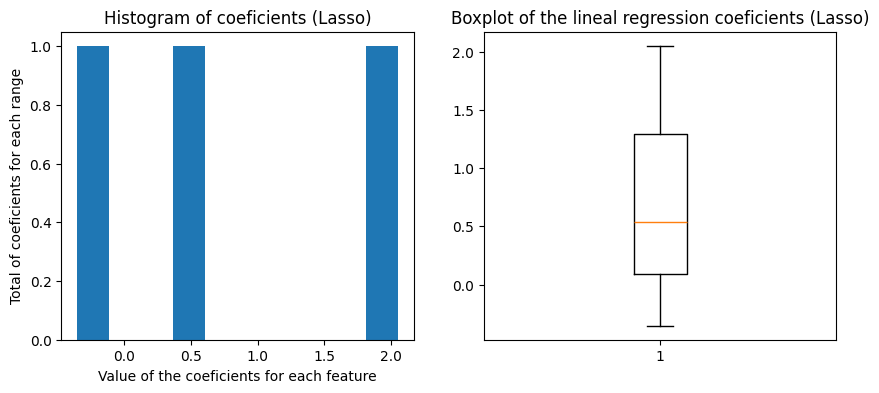

In [3718]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(m_lasso.coef_,10)
plt.xlabel('Value of the coeficients for each feature')
plt.ylabel('Total of coeficients for each range')
plt.title('Histogram of coeficients (Lasso)')
plt.subplot(1, 2, 2)
plt.boxplot(m_lasso.coef_)
plt.title('Boxplot of the lineal regression coeficients (Lasso)')
plt.show()

In [3719]:
print(f'The percentage of the cancelled variables is: {round(len(m_lasso.coef_[np.abs(m_lasso.coef_)==0])/len(m_lasso.coef_)*100,2)}%')
print(f'The Lasso regularized model use {len(m_lasso.coef_[np.abs(m_lasso.coef_)>0])} variables.')

The percentage of the cancelled variables is: 0.0%
The Lasso regularized model use 3 variables.


In [3720]:
get_metrics(ypred_lasso, y_test, ypred_train_lasso, y_train)

,R2,Median AE,MAPE
Train set,0.905166,0.548311,5.123611
Test set,0.908073,0.536501,5.195609
Diferencia,0.002907,-0.011810,0.071998


The Ridge model is testing using different alphas and CV searching a higher R2, lower MAPE or lower Differences between Train and Test.
These are the parameters tested for this data analysis:
- alphas between [-10,10], [-6,6], [-5,5]
- CV: 3, 5 or 7.

The best Lasso model for this case is:
- alphas: [-6,6,50]
- CV: 5.

In [3721]:
# Ridge regularization
m_ridge = RidgeCV(alphas=np.logspace(-6, 6, 50), cv=5).fit(X_train_scaled, y_train)

# Predictions with train and test data
ypred_train_ridge = m_ridge.predict(X_train_scaled)
ypred_ridge = m_ridge.predict(X_test_scaled)

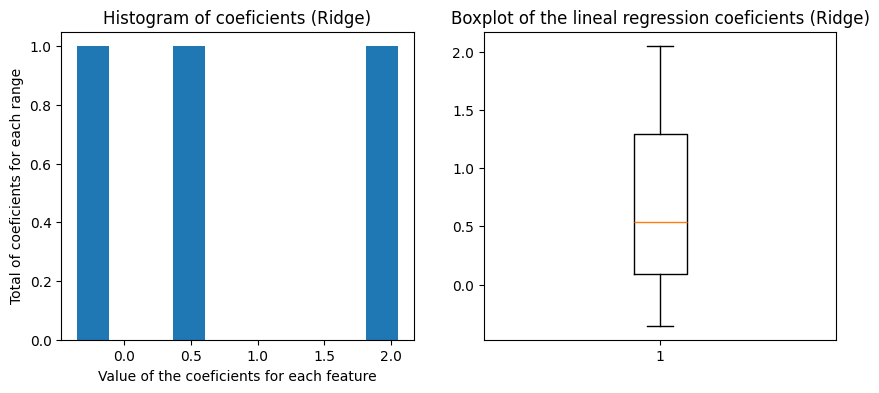

In [3722]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(m_ridge.coef_,10)
plt.xlabel('Value of the coeficients for each feature')
plt.ylabel('Total of coeficients for each range')
plt.title('Histogram of coeficients (Ridge)')
plt.subplot(1, 2, 2)
plt.boxplot(m_ridge.coef_)
plt.title('Boxplot of the lineal regression coeficients (Ridge)')
plt.show()

In [3723]:
print(f'The percentage of the cancelled variables is: {round(len(m_ridge.coef_[np.abs(m_ridge.coef_)==0])/len(m_ridge.coef_)*100,2)}%')
print(f'The Ridge regularized model use {len(m_ridge.coef_[np.abs(m_ridge.coef_)>0])} variables.')

The percentage of the cancelled variables is: 0.0%
The Ridge regularized model use 3 variables.


In [3724]:
print("Ridge metrics:")
get_metrics(ypred_ridge, y_test, ypred_train_ridge, y_train)

Ridge metrics:


,R2,Median AE,MAPE
Train set,0.905166,0.548337,5.123592
Test set,0.908073,0.536501,5.195593
Diferencia,0.002907,-0.011836,0.072001


In [3725]:
print("Linear regression metrics:")
get_metrics(ypred_test, y_test, ypred_train, y_train)

Linear regression metrics:


,R2,Median AE,MAPE
Train set,0.905166,0.548340,5.123593
Test set,0.908073,0.536503,5.195593
Diferencia,0.002907,-0.011837,0.072000


In [3726]:
print("Lasso metrics:")
get_metrics(ypred_lasso, y_test, ypred_train_lasso, y_train)

Lasso metrics:


,R2,Median AE,MAPE
Train set,0.905166,0.548311,5.123611
Test set,0.908073,0.536501,5.195609
Diferencia,0.002907,-0.011810,0.071998


The chosen model is the Lasso model because the MAPE Diference between Train set and Test set is the lowest one with a value of 0.0719 compared with 0.072 for the Ridge model or the Linear Regression model without regularization.